## Importing Libraries

In [3]:
# Imputation Libraries
from sklearn.impute import SimpleImputer

# Importing data for multi-output
from IPython.core.interactiveshell import InteractiveShell

# Data Analysis Libraries
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

# Importing Standardizer libraries
from sklearn.preprocessing import StandardScaler

# Warnings
import warnings

In [4]:
InteractiveShell.ast_node_interactivity = 'all'
pd.set_option('display.max_columns', None)
warnings.filterwarnings('ignore')

## Importing Data

In [5]:
df = pd.read_csv('../Data/train.csv')

In [6]:
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [7]:
df.shape

(1460, 81)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

# Missing Data

In [10]:
def view_missing(df):
    missing_df = pd.DataFrame()
    missing_df['columns'] = df.columns
    missing_df['missing_percentage'] = [(i/len(df))*100 for i in df.isnull().sum()]
    missing_df = missing_df.sort_values(by='missing_percentage', ascending=False)
    return missing_df[missing_df['missing_percentage'] != 0]

In [11]:
view_missing(df)

,columns,missing_percentage
72,PoolQC,99.520548
74,MiscFeature,96.301370
6,Alley,93.767123
73,Fence,80.753425
57,FireplaceQu,47.260274
3,LotFrontage,17.739726
59,GarageYrBlt,5.547945
64,GarageCond,5.547945
58,GarageType,5.547945
60,GarageFinish,5.547945


In [12]:
df.PoolQC.unique()

array([nan, 'Ex', 'Fa', 'Gd'], dtype=object)

In [13]:
df.PoolQC.value_counts()

Gd    3
Ex    2
Fa    2
Name: PoolQC, dtype: int64

nan in PoolQC means there are no pools in the houses. And this seems to be the case for 99 percent, so we can drop this.

In [14]:
df = df.drop('PoolQC', 1)

In [15]:
view_missing(df)

,columns,missing_percentage
73,MiscFeature,96.301370
6,Alley,93.767123
72,Fence,80.753425
57,FireplaceQu,47.260274
3,LotFrontage,17.739726
58,GarageType,5.547945
59,GarageYrBlt,5.547945
63,GarageQual,5.547945
64,GarageCond,5.547945
60,GarageFinish,5.547945


In [16]:
df.MiscFeature.unique()

array([nan, 'Shed', 'Gar2', 'Othr', 'TenC'], dtype=object)

In [17]:
df = df.drop('MiscFeature', 1)

In [18]:
view_missing(df)

,columns,missing_percentage
6,Alley,93.767123
72,Fence,80.753425
57,FireplaceQu,47.260274
3,LotFrontage,17.739726
59,GarageYrBlt,5.547945
58,GarageType,5.547945
60,GarageFinish,5.547945
63,GarageQual,5.547945
64,GarageCond,5.547945
32,BsmtExposure,2.602740


In [19]:
df.Alley.value_counts()

Grvl    50
Pave    41
Name: Alley, dtype: int64

In [20]:
df.Alley.fillna('No_Alley', inplace=True)

In [21]:
view_missing(df)

,columns,missing_percentage
72,Fence,80.753425
57,FireplaceQu,47.260274
3,LotFrontage,17.739726
58,GarageType,5.547945
59,GarageYrBlt,5.547945
60,GarageFinish,5.547945
63,GarageQual,5.547945
64,GarageCond,5.547945
32,BsmtExposure,2.602740
35,BsmtFinType2,2.602740


In [22]:
df.Fence.value_counts()

MnPrv    157
GdPrv     59
GdWo      54
MnWw      11
Name: Fence, dtype: int64

In [23]:
df.Fence.unique()

array([nan, 'MnPrv', 'GdWo', 'GdPrv', 'MnWw'], dtype=object)

In [24]:
df.Fence.fillna('No_Fence', inplace=True)

In [25]:
view_missing(df)

,columns,missing_percentage
57,FireplaceQu,47.260274
3,LotFrontage,17.739726
58,GarageType,5.547945
59,GarageYrBlt,5.547945
60,GarageFinish,5.547945
63,GarageQual,5.547945
64,GarageCond,5.547945
32,BsmtExposure,2.602740
35,BsmtFinType2,2.602740
30,BsmtQual,2.534247


In [26]:
df.FireplaceQu.value_counts()

Gd    380
TA    313
Fa     33
Ex     24
Po     20
Name: FireplaceQu, dtype: int64

In [27]:
df.FireplaceQu.fillna('No_Fireplace', inplace=True)

In [28]:
view_missing(df)

,columns,missing_percentage
3,LotFrontage,17.739726
58,GarageType,5.547945
59,GarageYrBlt,5.547945
60,GarageFinish,5.547945
63,GarageQual,5.547945
64,GarageCond,5.547945
35,BsmtFinType2,2.602740
32,BsmtExposure,2.602740
30,BsmtQual,2.534247
31,BsmtCond,2.534247


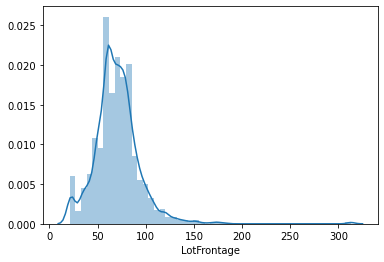

In [29]:
sns.distplot(df.LotFrontage)

<Figure size 720x432 with 0 Axes>

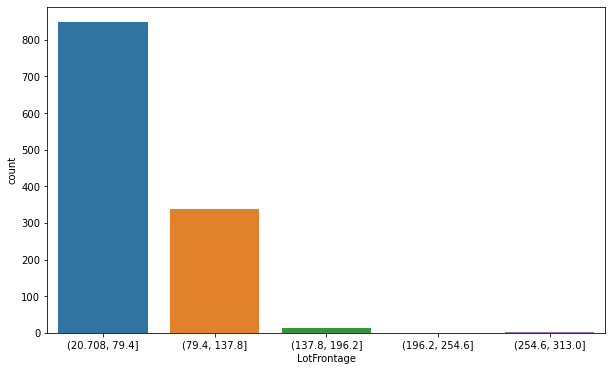

In [30]:
plt.figure(figsize=(10, 6))
a = pd.cut(df.LotFrontage, 5)
sns.countplot(a)

In [31]:
si = SimpleImputer()

In [32]:
df[['LotFrontage']] = si.fit_transform(df[['LotFrontage']])

In [33]:
view_missing(df)

,columns,missing_percentage
58,GarageType,5.547945
64,GarageCond,5.547945
59,GarageYrBlt,5.547945
60,GarageFinish,5.547945
63,GarageQual,5.547945
35,BsmtFinType2,2.602740
32,BsmtExposure,2.602740
33,BsmtFinType1,2.534247
31,BsmtCond,2.534247
30,BsmtQual,2.534247


In [34]:
garage_cols = ['GarageType','GarageCond','GarageYrBlt','GarageFinish','GarageQual']

df[garage_cols].isnull().sum()

GarageType      81
GarageCond      81
GarageYrBlt     81
GarageFinish    81
GarageQual      81
dtype: int64

In [35]:
df[df['GarageType'].isnull()][garage_cols]

,GarageType,GarageCond,GarageYrBlt,GarageFinish,GarageQual
39,NaN,NaN,NaN,NaN,NaN
48,NaN,NaN,NaN,NaN,NaN
78,NaN,NaN,NaN,NaN,NaN
88,NaN,NaN,NaN,NaN,NaN
89,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...
1349,NaN,NaN,NaN,NaN,NaN
1407,NaN,NaN,NaN,NaN,NaN
1449,NaN,NaN,NaN,NaN,NaN
1450,NaN,NaN,NaN,NaN,NaN


In [36]:
df[garage_cols]

,GarageType,GarageCond,GarageYrBlt,GarageFinish,GarageQual
0,Attchd,TA,2003.0,RFn,TA
1,Attchd,TA,1976.0,RFn,TA
2,Attchd,TA,2001.0,RFn,TA
3,Detchd,TA,1998.0,Unf,TA
4,Attchd,TA,2000.0,RFn,TA
...,...,...,...,...,...
1455,Attchd,TA,1999.0,RFn,TA
1456,Attchd,TA,1978.0,Unf,TA
1457,Attchd,TA,1941.0,RFn,TA
1458,Attchd,TA,1950.0,Unf,TA


In [37]:
df.GarageType.fillna('No_Garage', inplace=True)

In [38]:
df.GarageCond.fillna('No_Garage', inplace=True)

In [39]:
df.GarageYrBlt.fillna(0, inplace=True)

In [40]:
df.GarageFinish.fillna('No_Garage', inplace=True)

In [41]:
df.GarageQual.fillna('No_Garage', inplace=True)

In [42]:
view_missing(df)

,columns,missing_percentage
35,BsmtFinType2,2.602740
32,BsmtExposure,2.602740
33,BsmtFinType1,2.534247
30,BsmtQual,2.534247
31,BsmtCond,2.534247
25,MasVnrType,0.547945
26,MasVnrArea,0.547945
42,Electrical,0.068493


In [43]:
bsmt = ['BsmtFinType1', 'BsmtFinType2','BsmtExposure','BsmtFinType1', 'BsmtCond']

In [44]:
df[bsmt]

,BsmtFinType1,BsmtFinType2,BsmtExposure,BsmtFinType1,BsmtCond
0,GLQ,Unf,No,GLQ,TA
1,ALQ,Unf,Gd,ALQ,TA
2,GLQ,Unf,Mn,GLQ,TA
3,ALQ,Unf,No,ALQ,Gd
4,GLQ,Unf,Av,GLQ,TA
...,...,...,...,...,...
1455,Unf,Unf,No,Unf,TA
1456,ALQ,Rec,No,ALQ,TA
1457,GLQ,Unf,No,GLQ,Gd
1458,GLQ,Rec,Mn,GLQ,TA


In [45]:
df[df.BsmtFinType2.isnull()][bsmt]

,BsmtFinType1,BsmtFinType2,BsmtExposure,BsmtFinType1,BsmtCond
17,NaN,NaN,NaN,NaN,NaN
39,NaN,NaN,NaN,NaN,NaN
90,NaN,NaN,NaN,NaN,NaN
102,NaN,NaN,NaN,NaN,NaN
156,NaN,NaN,NaN,NaN,NaN
182,NaN,NaN,NaN,NaN,NaN
259,NaN,NaN,NaN,NaN,NaN
332,GLQ,NaN,No,GLQ,TA
342,NaN,NaN,NaN,NaN,NaN
362,NaN,NaN,NaN,NaN,NaN


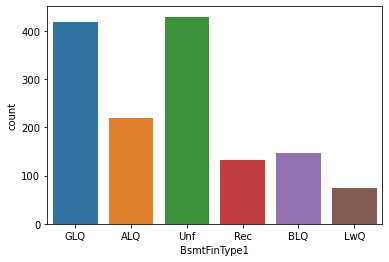

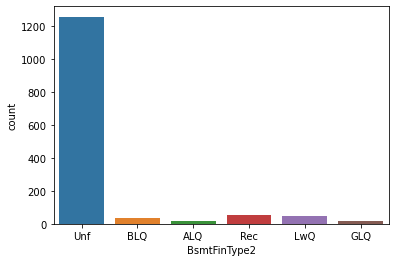

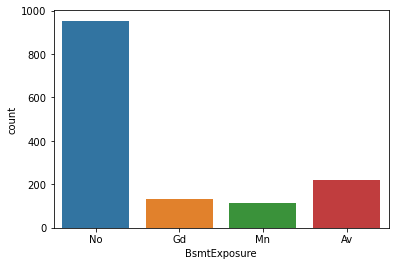

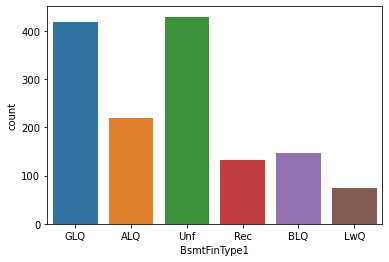

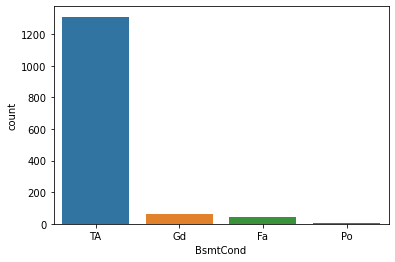

In [46]:
for i in df[bsmt].columns:
    sns.countplot(df[i])
    plt.show()

In [47]:
# df[bsmt].fillna('No_Basement', inplace=True)

In [48]:
view_missing(df)

,columns,missing_percentage
35,BsmtFinType2,2.602740
32,BsmtExposure,2.602740
33,BsmtFinType1,2.534247
30,BsmtQual,2.534247
31,BsmtCond,2.534247
25,MasVnrType,0.547945
26,MasVnrArea,0.547945
42,Electrical,0.068493


In [49]:
df['BsmtFinType2'].fillna('No_Basement', inplace=True)
df['BsmtFinType1'].fillna('No_Basement', inplace=True)
df['BsmtExposure'].fillna('No_Basement', inplace=True)
df['BsmtQual'].fillna('No_Basement', inplace=True)
df['BsmtCond'].fillna('No_Basement', inplace=True)

In [50]:
view_missing(df)

,columns,missing_percentage
25,MasVnrType,0.547945
26,MasVnrArea,0.547945
42,Electrical,0.068493


In [51]:
df.MasVnrType.value_counts()

None       864
BrkFace    445
Stone      128
BrkCmn      15
Name: MasVnrType, dtype: int64

In [52]:
df.isnull().sum()[['MasVnrArea', 'MasVnrType']]

MasVnrArea    8
MasVnrType    8
dtype: int64

In [53]:
df.drop(['MasVnrArea', 'MasVnrType'], inplace=True, axis=1)

In [54]:
view_missing(df)

,columns,missing_percentage
40,Electrical,0.068493


In [55]:
df.Electrical.unique()

array(['SBrkr', 'FuseF', 'FuseA', 'FuseP', 'Mix', nan], dtype=object)

In [56]:
df.dropna(subset=['Electrical'], inplace=True)

In [57]:
view_missing(df)

,columns,missing_percentage


In [58]:
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,Fence,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,No_Alley,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,No_Fireplace,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,No_Fence,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,No_Alley,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,No_Fence,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,No_Alley,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,No_Fence,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,No_Alley,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,No_Fence,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,No_Alley,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,No_Fence,0,12,2008,WD,Normal,250000


In [59]:
df.shape

(1459, 77)

# Exploratory Data Analysis

In [60]:
df.drop('Id', axis=1, inplace=True)

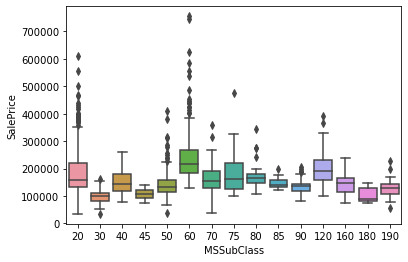

In [61]:
sns.boxplot(df.MSSubClass, df.SalePrice)

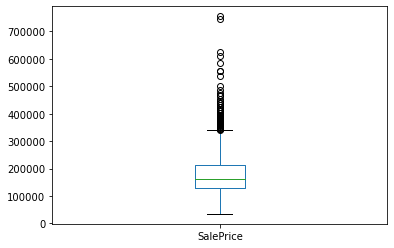

In [62]:
df.SalePrice.plot.box()

In [63]:
cols = ['GarageArea', 'GrLivArea', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF',
 '2ndFlrSF','BsmtFinSF1', 'BsmtFinSF2', 'LotArea', 'LotFrontage']

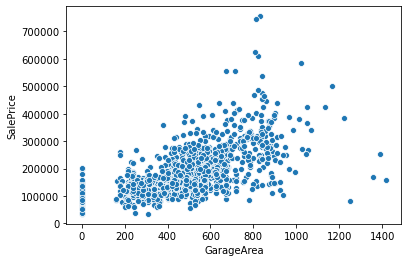

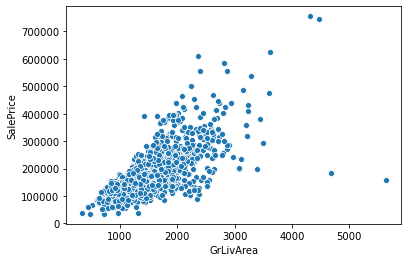

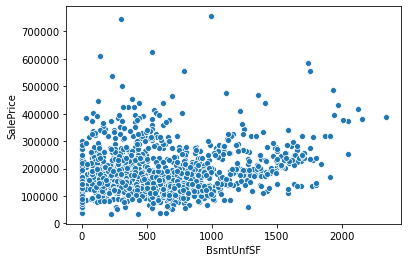

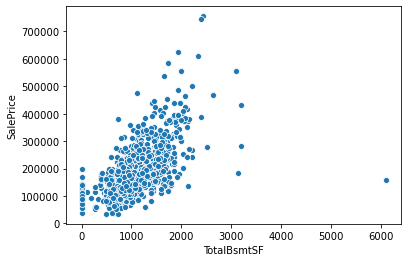

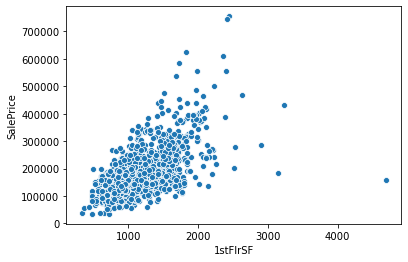

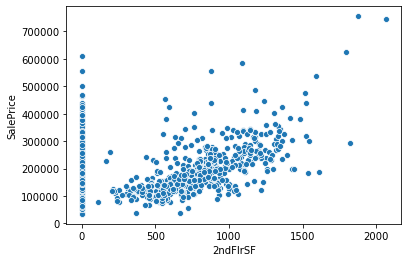

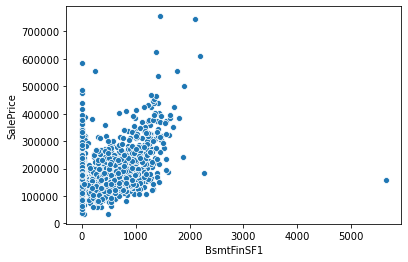

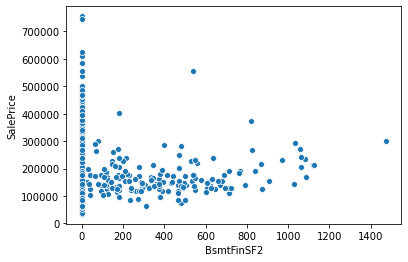

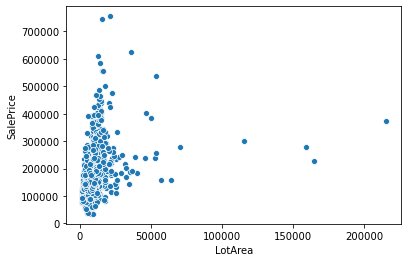

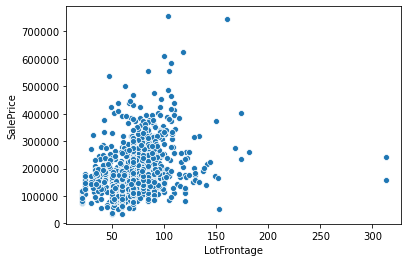

In [64]:
for i in cols:
    sns.scatterplot(df[i], df.SalePrice)
    plt.show()

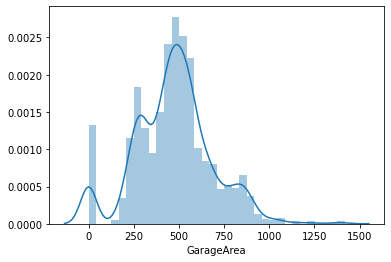

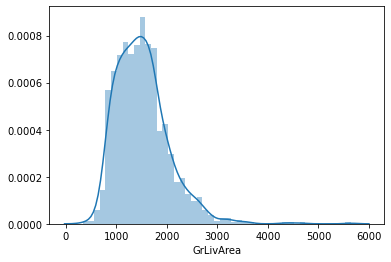

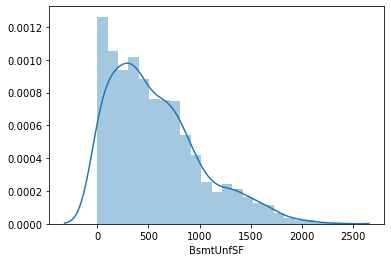

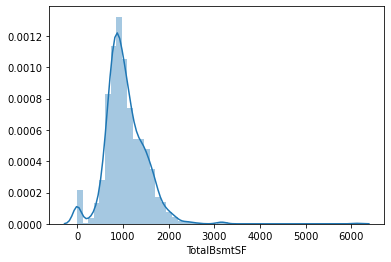

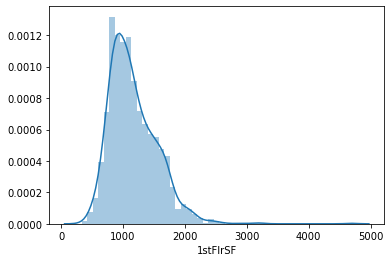

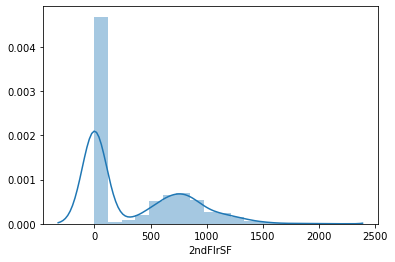

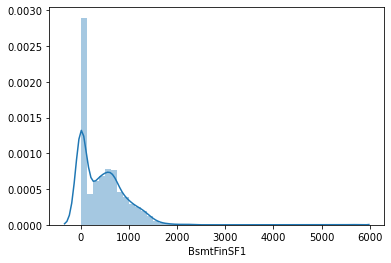

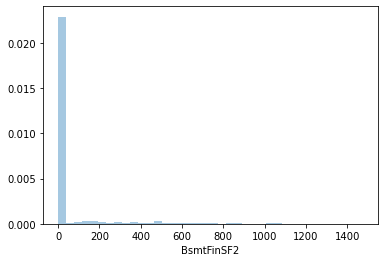

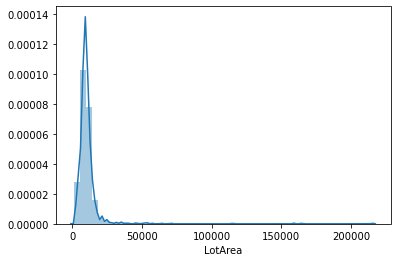

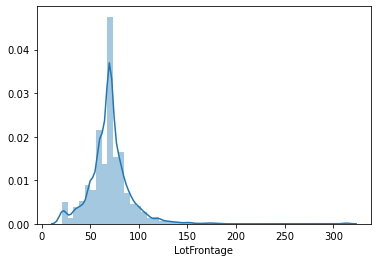

In [65]:
for i in cols:
    sns.distplot(df[i])
    plt.show()

In [66]:
cat_cols = list(df.select_dtypes('object').columns)

numcat_cols = ['MSSubClass', 'OverallQual', 'OverallCond', 'YearBuilt',
'YearRemodAdd', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd',
'Fireplaces', 'GarageCars', 'MoSold', 'YrSold']

cat_cols.extend(numcat_cols)

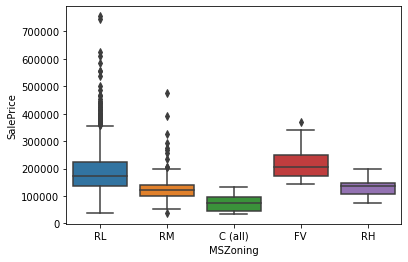

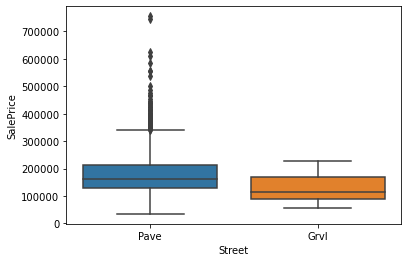

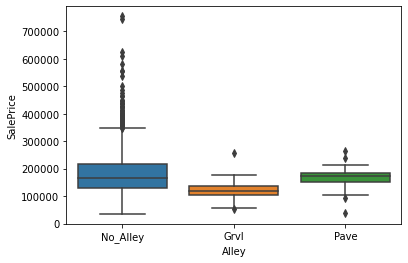

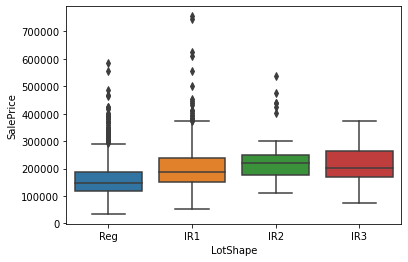

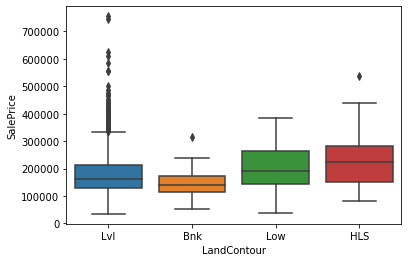

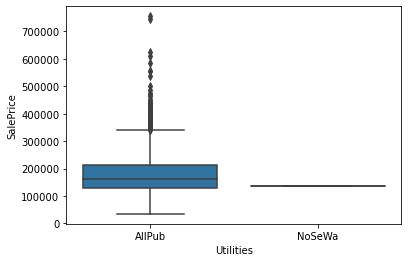

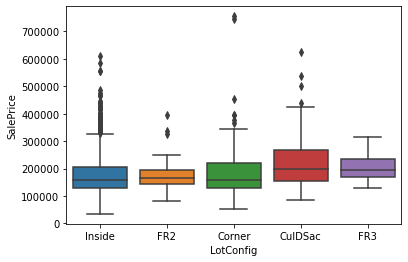

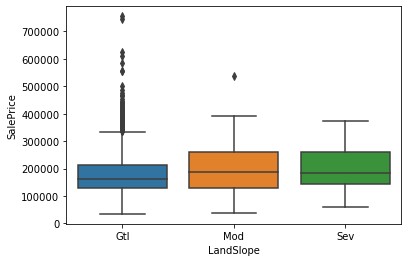

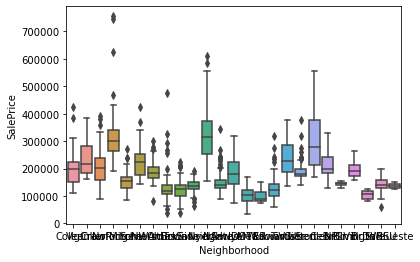

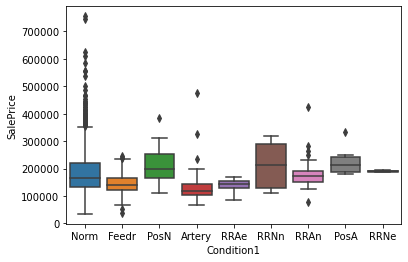

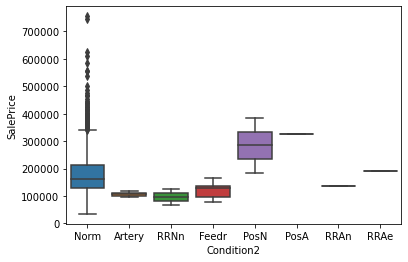

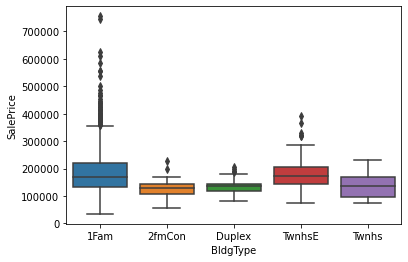

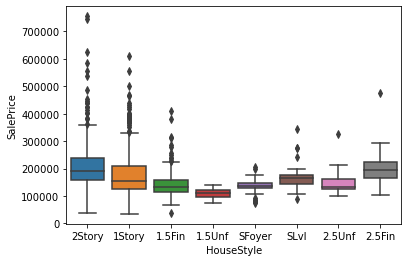

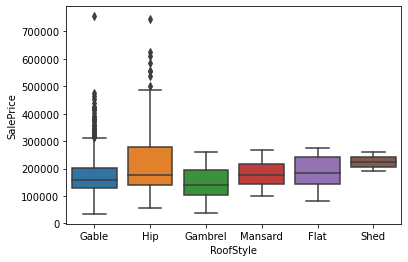

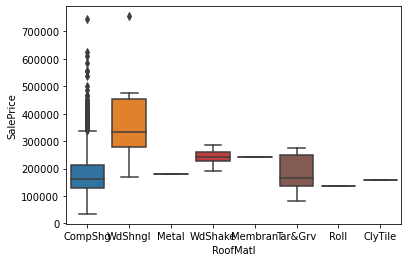

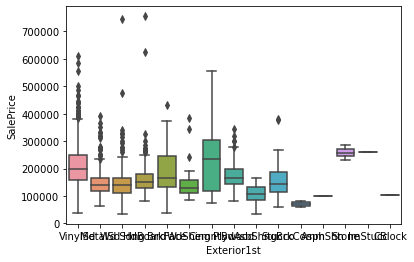

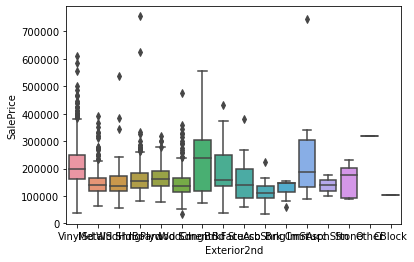

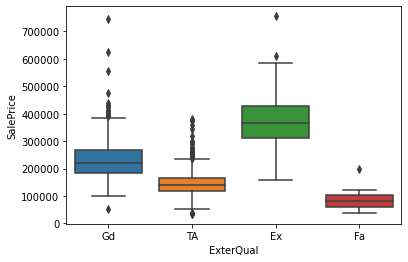

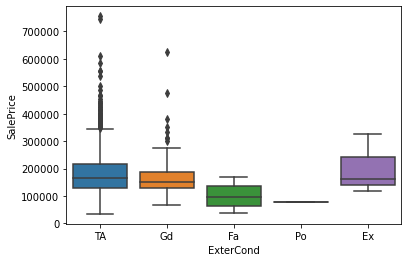

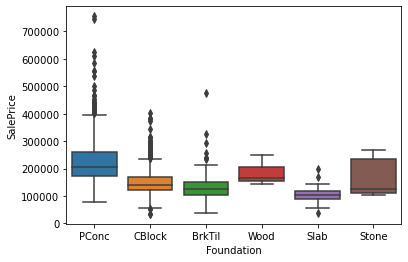

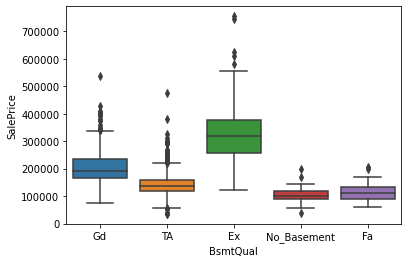

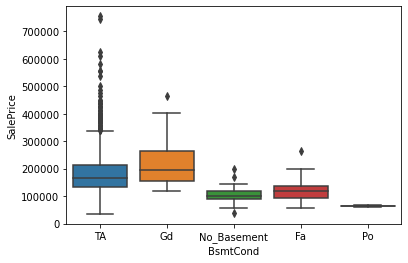

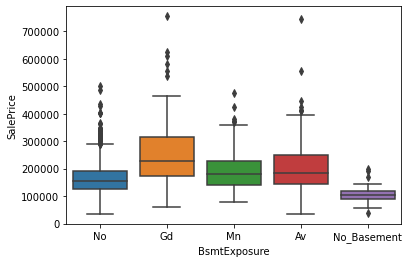

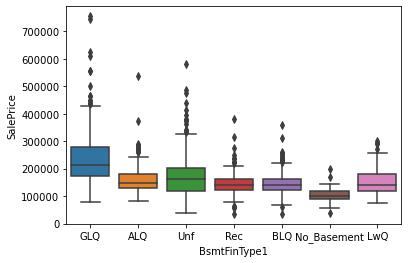

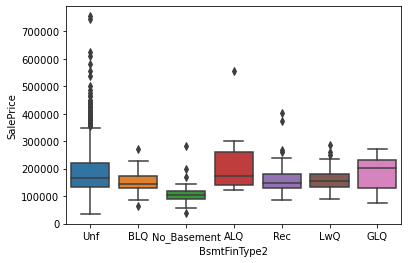

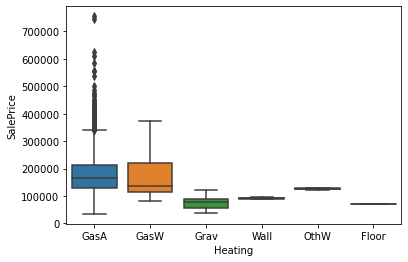

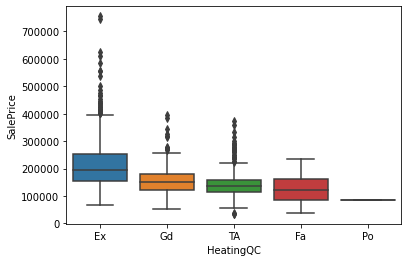

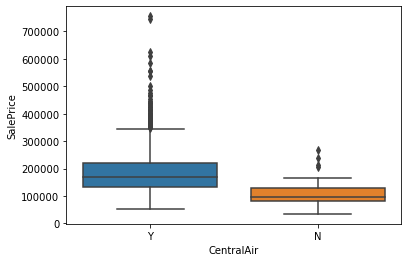

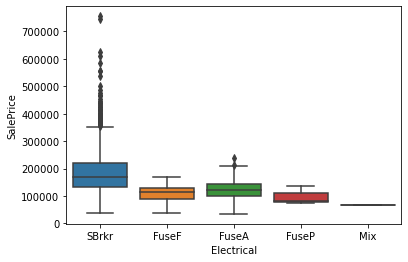

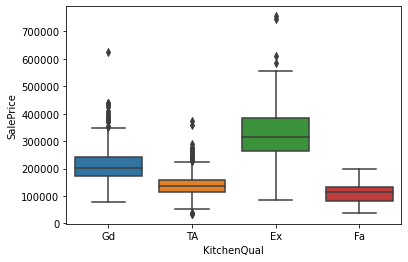

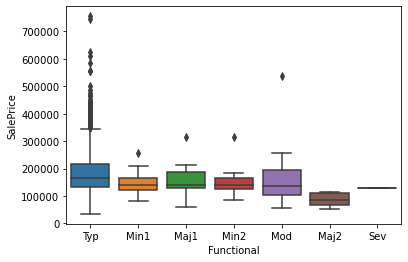

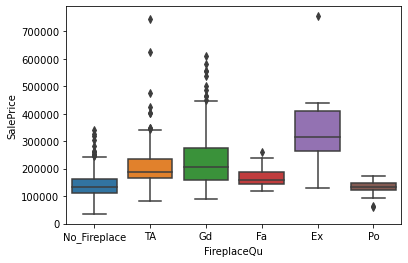

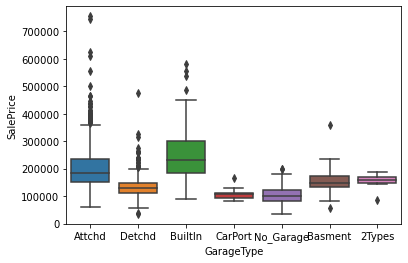

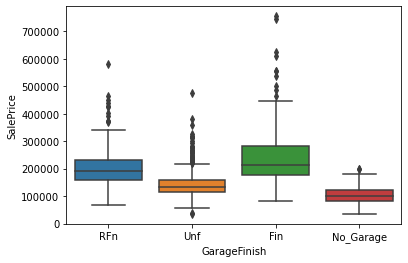

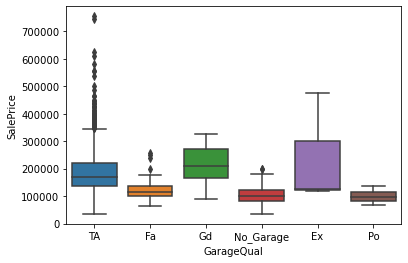

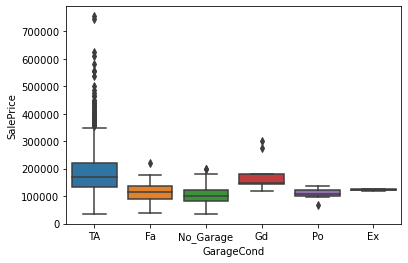

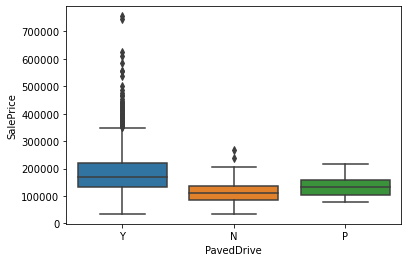

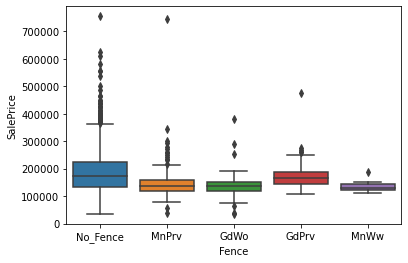

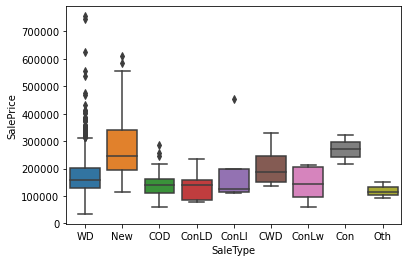

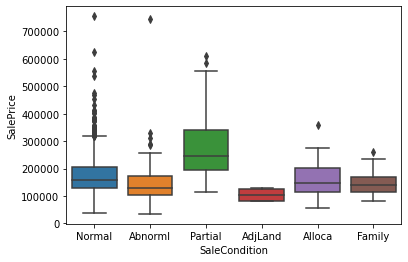

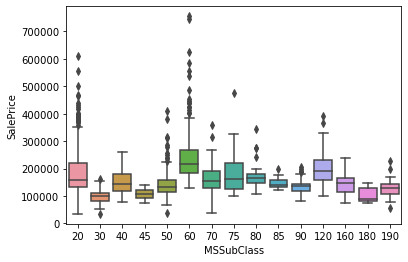

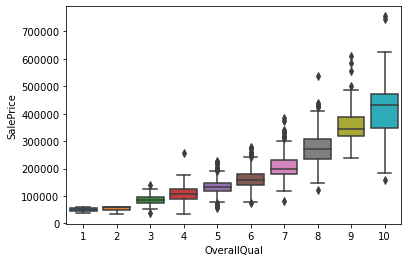

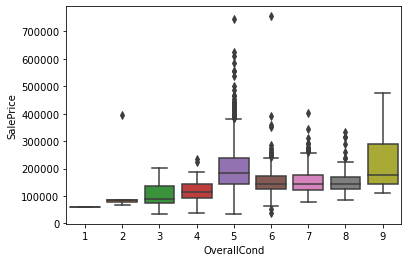

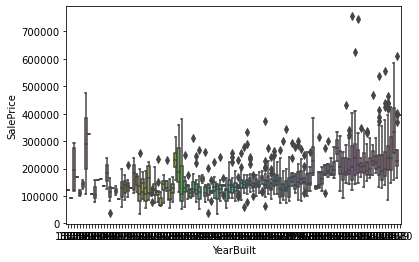

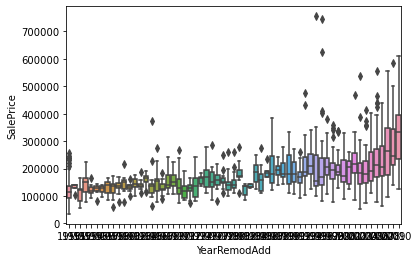

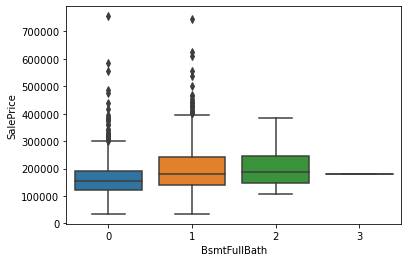

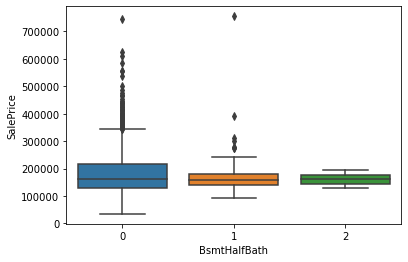

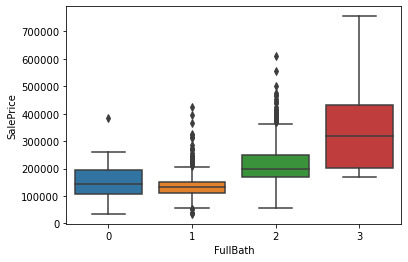

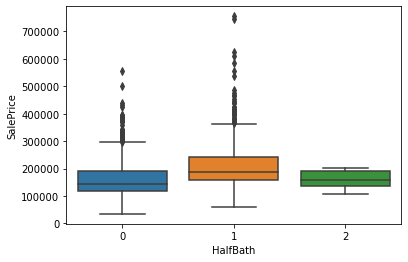

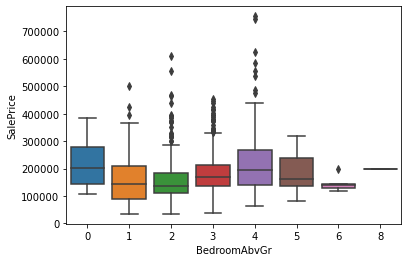

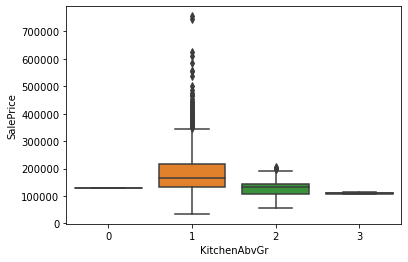

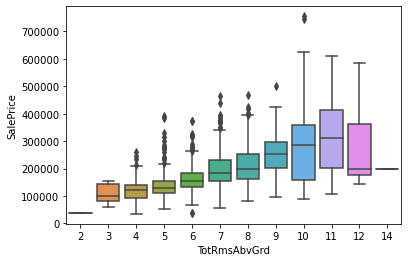

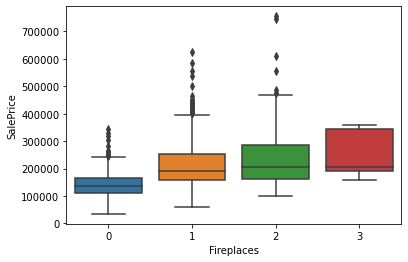

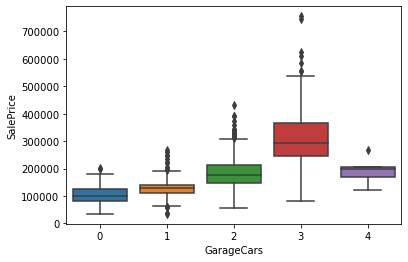

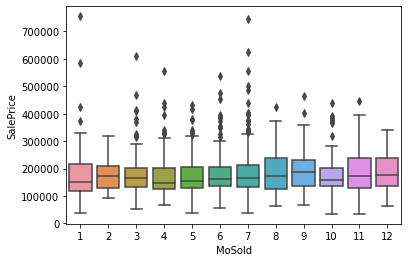

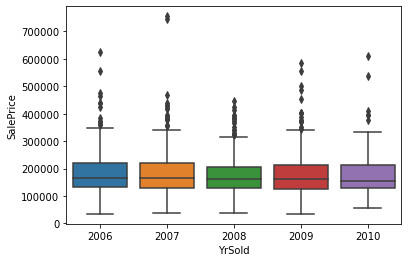

In [71]:
for i in cat_cols:
    sns.boxplot(df[i], df.SalePrice)
    plt.show()

# Dummy Variable Creation

In [265]:
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,Fence,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,No_Alley,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,No_Fireplace,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,No_Fence,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,No_Alley,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,No_Fence,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,No_Alley,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,No_Fence,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,No_Alley,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,No_Fence,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,No_Alley,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,No_Fence,0,12,2008,WD,Normal,250000


In [266]:
cat_cols = list(df.select_dtypes('object').columns)

In [267]:
df.select_dtypes(exclude='object')

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
0,1,60,65.0,8450,7,5,2003,2003,706,0,150,856,856,854,0,1710,1,0,2,1,3,1,8,0,2003.0,2,548,0,61,0,0,0,0,0,2,2008,208500
1,2,20,80.0,9600,6,8,1976,1976,978,0,284,1262,1262,0,0,1262,0,1,2,0,3,1,6,1,1976.0,2,460,298,0,0,0,0,0,0,5,2007,181500
2,3,60,68.0,11250,7,5,2001,2002,486,0,434,920,920,866,0,1786,1,0,2,1,3,1,6,1,2001.0,2,608,0,42,0,0,0,0,0,9,2008,223500
3,4,70,60.0,9550,7,5,1915,1970,216,0,540,756,961,756,0,1717,1,0,1,0,3,1,7,1,1998.0,3,642,0,35,272,0,0,0,0,2,2006,140000
4,5,60,84.0,14260,8,5,2000,2000,655,0,490,1145,1145,1053,0,2198,1,0,2,1,4,1,9,1,2000.0,3,836,192,84,0,0,0,0,0,12,2008,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,62.0,7917,6,5,1999,2000,0,0,953,953,953,694,0,1647,0,0,2,1,3,1,7,1,1999.0,2,460,0,40,0,0,0,0,0,8,2007,175000
1456,1457,20,85.0,13175,6,6,1978,1988,790,163,589,1542,2073,0,0,2073,1,0,2,0,3,1,7,2,1978.0,2,500,349,0,0,0,0,0,0,2,2010,210000
1457,1458,70,66.0,9042,7,9,1941,2006,275,0,877,1152,1188,1152,0,2340,0,0,2,0,4,1,9,2,1941.0,1,252,0,60,0,0,0,0,2500,5,2010,266500
1458,1459,20,68.0,9717,5,6,1950,1996,49,1029,0,1078,1078,0,0,1078,1,0,1,0,2,1,5,0,1950.0,1,240,366,0,112,0,0,0,0,4,2010,142125


In [268]:
df.GarageCars.unique()

array([2, 3, 1, 0, 4], dtype=int64)

In [269]:
numcat_cols = ['MSSubClass', 'OverallQual', 'OverallCond', 'YearBuilt',
'YearRemodAdd', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd',
'Fireplaces', 'GarageCars', 'MoSold', 'YrSold']

In [270]:
cat_cols.extend(numcat_cols)

In [271]:
df[cat_cols] = df[cat_cols].astype('category')

In [272]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1459 entries, 0 to 1459
Data columns (total 77 columns):
 #   Column         Non-Null Count  Dtype   
---  ------         --------------  -----   
 0   Id             1459 non-null   int64   
 1   MSSubClass     1459 non-null   category
 2   MSZoning       1459 non-null   category
 3   LotFrontage    1459 non-null   float64 
 4   LotArea        1459 non-null   int64   
 5   Street         1459 non-null   category
 6   Alley          1459 non-null   category
 7   LotShape       1459 non-null   category
 8   LandContour    1459 non-null   category
 9   Utilities      1459 non-null   category
 10  LotConfig      1459 non-null   category
 11  LandSlope      1459 non-null   category
 12  Neighborhood   1459 non-null   category
 13  Condition1     1459 non-null   category
 14  Condition2     1459 non-null   category
 15  BldgType       1459 non-null   category
 16  HouseStyle     1459 non-null   category
 17  OverallQual    1459 non-null   ca

#### For dummy variable creation, keeping in mind about missing values imputation, we shall remove the " No_XX" imputed variables

In [273]:
from sklearn.preprocessing import OneHotEncoder

In [274]:
for i in cat_cols:
    print(df[i].value_counts())

RL         1150
RM          218
FV           65
RH           16
C (all)      10
Name: MSZoning, dtype: int64
Pave    1453
Grvl       6
Name: Street, dtype: int64
No_Alley    1368
Grvl          50
Pave          41
Name: Alley, dtype: int64
Reg    924
IR1    484
IR2     41
IR3     10
Name: LotShape, dtype: int64
Lvl    1310
Bnk      63
HLS      50
Low      36
Name: LandContour, dtype: int64
AllPub    1458
NoSeWa       1
Name: Utilities, dtype: int64
Inside     1051
Corner      263
CulDSac      94
FR2          47
FR3           4
Name: LotConfig, dtype: int64
Gtl    1381
Mod      65
Sev      13
Name: LandSlope, dtype: int64
NAmes      225
CollgCr    150
OldTown    113
Edwards    100
Somerst     86
Gilbert     79
NridgHt     77
Sawyer      74
NWAmes      73
SawyerW     59
BrkSide     58
Crawfor     51
Mitchel     49
NoRidge     41
Timber      37
IDOTRR      37
ClearCr     28
SWISU       25
StoneBr     25
Blmngtn     17
MeadowV     17
BrDale      16
Veenker     11
NPkVill      9
Blueste     

In [275]:
dummies = pd.get_dummies(df[cat_cols])

In [276]:
dummies['BsmtFullBath_0']

0       0
1       1
2       0
3       0
4       0
       ..
1455    1
1456    0
1457    1
1458    0
1459    0
Name: BsmtFullBath_0, Length: 1459, dtype: uint8

In [277]:
cols = ['YrSold_2010', 'MoSold_12', 'GarageCars_4', 'Fireplaces_3', 'TotRmsAbvGrd_14', 
'KitchenAbvGr_3', 'BedroomAbvGr_8', 'HalfBath_2', 'FullBath_3', 'BsmtFullBath_0', 'BsmtHalfBath_2',
'YearRemodAdd_2010', 'YearBuilt_2010', 'OverallCond_9', 'OverallQual_10', 'MSSubClass_190',
'SaleCondition_Partial', 'SaleType_WD', 'Fence_No_Fence', 'PavedDrive_Y',
'GarageCond_No_Garage', 'GarageQual_No_Garage', 'GarageFinish_No_Garage', 'GarageType_No_Garage', 
'FireplaceQu_No_Fireplace', 'Functional_Typ', 'KitchenQual_TA', 'Electrical_SBrkr', 'CentralAir_N',
'Heating_Floor','HeatingQC_TA', 'BsmtFinType2_No_Basement', 'BsmtFinType1_No_Basement', 'BsmtExposure_No_Basement',
'BsmtCond_No_Basement', 'BsmtQual_No_Basement', 'Foundation_Wood', 'ExterCond_TA', 'ExterQual_TA', 'Exterior2nd_Other', 
'Exterior1st_AsbShng', 'RoofMatl_WdShngl', 'RoofStyle_Shed', 'HouseStyle_SLvl', 
'BldgType_TwnhsE', 'Condition2_RRNn', 'Condition1_RRNn', 'Neighborhood_Blmngtn',
'LandSlope_Sev', 'LotConfig_Inside', 'Utilities_NoSeWa', 'LandContour_Bnk',
'LotShape_Reg', 'Alley_No_Alley', 'Street_Grvl', 'MSZoning_RM']

In [278]:
cols = cols[::-1]

In [279]:
dummies.drop(cols, 1, inplace=True)

In [280]:
dummies.shape

(1459, 468)

In [281]:
df.drop(cat_cols, 1, inplace=True)

In [282]:
df = pd.concat([df, dummies], axis=1)

In [283]:
df.head()

,Id,LotFrontage,LotArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,GarageYrBlt,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,SalePrice,MSZoning_C (all),MSZoning_FV,MSZoning_RH,MSZoning_RL,Street_Pave,Alley_Grvl,Alley_Pave,LotShape_IR1,LotShape_IR2,LotShape_IR3,LandContour_HLS,LandContour_Low,LandContour_Lvl,Utilities_AllPub,LotConfig_Corner,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LandSlope_Gtl,LandSlope_Mod,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,Condition1_Artery,Condition1_Feedr,Condition1_Norm,Condition1_PosA,Condition1_PosN,Condition1_RRAe,Condition1_RRAn,Condition1_RRNe,Condition2_Artery,Condition2_Feedr,Condition2_Norm,Condition2_PosA,Condition2_PosN,Condition2_RRAe,Condition2_RRAn,BldgType_1Fam,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,HouseStyle_1.5Fin,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Fin,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,RoofStyle_Flat,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard,RoofMatl_ClyTile,RoofMatl_CompShg,RoofMatl_Membran,RoofMatl_Metal,RoofMatl_Roll,RoofMatl_Tar&Grv,RoofMatl_WdShake,Exterior1st_AsphShn,Exterior1st_BrkComm,Exterior1st_BrkFace,Exterior1st_CBlock,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_ImStucc,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_Stone,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing,Exterior2nd_AsbShng,Exterior2nd_AsphShn,Exterior2nd_Brk Cmn,Exterior2nd_BrkFace,Exterior2nd_CBlock,Exterior2nd_CmentBd,Exterior2nd_HdBoard,Exterior2nd_ImStucc,Exterior2nd_MetalSd,Exterior2nd_Plywood,Exterior2nd_Stone,Exterior2nd_Stucco,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng,ExterQual_Ex,ExterQual_Fa,ExterQual_Gd,ExterCond_Ex,ExterCond_Fa,ExterCond_Gd,ExterCond_Po,Foundation_BrkTil,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,BsmtQual_Ex,BsmtQual_Fa,BsmtQual_Gd,BsmtQual_TA,BsmtCond_Fa,BsmtCond_Gd,BsmtCond_Po,BsmtCond_TA,BsmtExposure_Av,BsmtExposure_Gd,BsmtExposure_Mn,BsmtExposure_No,BsmtFinType1_ALQ,BsmtFinType1_BLQ,BsmtFinType1_GLQ,BsmtFinType1_LwQ,BsmtFinType1_Rec,BsmtFinType1_Unf,BsmtFinType2_ALQ,BsmtFinType2_BLQ,BsmtFinType2_GLQ,BsmtFinType2_LwQ,BsmtFinType2_Rec,BsmtFinType2_Unf,Heating_GasA,Heating_GasW,Heating_Grav,Heating_OthW,Heating_Wall,HeatingQC_Ex,HeatingQC_Fa,HeatingQC_Gd,HeatingQC_Po,CentralAir_Y,Electrical_FuseA,Electrical_FuseF,Electrical_FuseP,Electrical_Mix,KitchenQual_Ex,KitchenQual_Fa,KitchenQual_Gd,Functional_Maj1,Functional_Maj2,Functional_Min1,Functional_Min2,Functional_Mod,Functional_Sev,FireplaceQu_Ex,FireplaceQu_Fa,FireplaceQu_Gd,FireplaceQu_Po,FireplaceQu_TA,GarageType_2Types,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageFinish_Fin,GarageFinish_RFn,GarageFinish_Unf,GarageQual_Ex,GarageQual_Fa,GarageQual_Gd,GarageQual_Po,GarageQual_TA,GarageCond_Ex,GarageCond_Fa,GarageCond_Gd,GarageCond_Po,GarageCond_TA,PavedDrive_N,PavedDrive_P,Fence_GdPrv,Fence_GdWo,Fence_MnPrv,Fence_MnWw,SaleType_COD,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,MSSubClass_20,MSSubClass_30,MSSubClass_40,MSSubClass_45,MSSubClass_50,MSSubClass_60,MSSubClass_70,MSSubClass_75,MSSubClass_80,MSSubClass_85,MSSubClass_90,MSSubClass_120,MSSubClass_160,MSSubClass_180,OverallQual_1,OverallQual_2,OverallQual_3,OverallQual_4,OverallQ

In [284]:

df.info(max_cols=500)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1459 entries, 0 to 1459
Data columns (total 489 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Id                     1459 non-null   int64  
 1   LotFrontage            1459 non-null   float64
 2   LotArea                1459 non-null   int64  
 3   BsmtFinSF1             1459 non-null   int64  
 4   BsmtFinSF2             1459 non-null   int64  
 5   BsmtUnfSF              1459 non-null   int64  
 6   TotalBsmtSF            1459 non-null   int64  
 7   1stFlrSF               1459 non-null   int64  
 8   2ndFlrSF               1459 non-null   int64  
 9   LowQualFinSF           1459 non-null   int64  
 10  GrLivArea              1459 non-null   int64  
 11  GarageYrBlt            1459 non-null   float64
 12  GarageArea             1459 non-null   int64  
 13  WoodDeckSF             1459 non-null   int64  
 14  OpenPorchSF            1459 non-null   int64  
 15  Enc

# Standardizing the data

In [285]:
df.info(max_cols=500)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1459 entries, 0 to 1459
Data columns (total 489 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Id                     1459 non-null   int64  
 1   LotFrontage            1459 non-null   float64
 2   LotArea                1459 non-null   int64  
 3   BsmtFinSF1             1459 non-null   int64  
 4   BsmtFinSF2             1459 non-null   int64  
 5   BsmtUnfSF              1459 non-null   int64  
 6   TotalBsmtSF            1459 non-null   int64  
 7   1stFlrSF               1459 non-null   int64  
 8   2ndFlrSF               1459 non-null   int64  
 9   LowQualFinSF           1459 non-null   int64  
 10  GrLivArea              1459 non-null   int64  
 11  GarageYrBlt            1459 non-null   float64
 12  GarageArea             1459 non-null   int64  
 13  WoodDeckSF             1459 non-null   int64  
 14  OpenPorchSF            1459 non-null   int64  
 15  Enc

In [297]:
cols = list(df.select_dtypes(exclude='uint8').columns)

In [299]:
cols.remove('SalePrice')

In [300]:
scaler = StandardScaler()

In [301]:
df[cols] = scaler.fit_transform(df[cols])

In [303]:
df.head()

,Id,LotFrontage,LotArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,GarageYrBlt,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,SalePrice,MSZoning_C (all),MSZoning_FV,MSZoning_RH,MSZoning_RL,Street_Pave,Alley_Grvl,Alley_Pave,LotShape_IR1,LotShape_IR2,LotShape_IR3,LandContour_HLS,LandContour_Low,LandContour_Lvl,Utilities_AllPub,LotConfig_Corner,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LandSlope_Gtl,LandSlope_Mod,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,Condition1_Artery,Condition1_Feedr,Condition1_Norm,Condition1_PosA,Condition1_PosN,Condition1_RRAe,Condition1_RRAn,Condition1_RRNe,Condition2_Artery,Condition2_Feedr,Condition2_Norm,Condition2_PosA,Condition2_PosN,Condition2_RRAe,Condition2_RRAn,BldgType_1Fam,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,HouseStyle_1.5Fin,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Fin,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,RoofStyle_Flat,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard,RoofMatl_ClyTile,RoofMatl_CompShg,RoofMatl_Membran,RoofMatl_Metal,RoofMatl_Roll,RoofMatl_Tar&Grv,RoofMatl_WdShake,Exterior1st_AsphShn,Exterior1st_BrkComm,Exterior1st_BrkFace,Exterior1st_CBlock,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_ImStucc,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_Stone,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing,Exterior2nd_AsbShng,Exterior2nd_AsphShn,Exterior2nd_Brk Cmn,Exterior2nd_BrkFace,Exterior2nd_CBlock,Exterior2nd_CmentBd,Exterior2nd_HdBoard,Exterior2nd_ImStucc,Exterior2nd_MetalSd,Exterior2nd_Plywood,Exterior2nd_Stone,Exterior2nd_Stucco,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng,ExterQual_Ex,ExterQual_Fa,ExterQual_Gd,ExterCond_Ex,ExterCond_Fa,ExterCond_Gd,ExterCond_Po,Foundation_BrkTil,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,BsmtQual_Ex,BsmtQual_Fa,BsmtQual_Gd,BsmtQual_TA,BsmtCond_Fa,BsmtCond_Gd,BsmtCond_Po,BsmtCond_TA,BsmtExposure_Av,BsmtExposure_Gd,BsmtExposure_Mn,BsmtExposure_No,BsmtFinType1_ALQ,BsmtFinType1_BLQ,BsmtFinType1_GLQ,BsmtFinType1_LwQ,BsmtFinType1_Rec,BsmtFinType1_Unf,BsmtFinType2_ALQ,BsmtFinType2_BLQ,BsmtFinType2_GLQ,BsmtFinType2_LwQ,BsmtFinType2_Rec,BsmtFinType2_Unf,Heating_GasA,Heating_GasW,Heating_Grav,Heating_OthW,Heating_Wall,HeatingQC_Ex,HeatingQC_Fa,HeatingQC_Gd,HeatingQC_Po,CentralAir_Y,Electrical_FuseA,Electrical_FuseF,Electrical_FuseP,Electrical_Mix,KitchenQual_Ex,KitchenQual_Fa,KitchenQual_Gd,Functional_Maj1,Functional_Maj2,Functional_Min1,Functional_Min2,Functional_Mod,Functional_Sev,FireplaceQu_Ex,FireplaceQu_Fa,FireplaceQu_Gd,FireplaceQu_Po,FireplaceQu_TA,GarageType_2Types,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageFinish_Fin,GarageFinish_RFn,GarageFinish_Unf,GarageQual_Ex,GarageQual_Fa,GarageQual_Gd,GarageQual_Po,GarageQual_TA,GarageCond_Ex,GarageCond_Fa,GarageCond_Gd,GarageCond_Po,GarageCond_TA,PavedDrive_N,PavedDrive_P,Fence_GdPrv,Fence_GdWo,Fence_MnPrv,Fence_MnWw,SaleType_COD,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,MSSubClass_20,MSSubClass_30,MSSubClass_40,MSSubClass_45,MSSubClass_50,MSSubClass_60,MSSubClass_70,MSSubClass_75,MSSubClass_80,MSSubClass_85,MSSubClass_90,MSSubClass_120,MSSubClass_160,MSSubClass_180,OverallQual_1,OverallQual_2,OverallQual_3,OverallQual_4,OverallQ

Model building

In [304]:
from sklearn.model_selection import train_test_split

In [305]:
df_train, df_test = train_test_split(df, train_size=0.8, random_state=42)

In [306]:
y_train = df_train.pop('SalePrice')
X_train = df_train
y_test = df_test.pop('SalePrice')
X_test = df_test

In [307]:
from sklearn.linear_model import LinearRegression

In [308]:
lr = LinearRegression()

In [309]:
lr.fit(X_train, y_train)

LinearRegression()

In [310]:
lr.score(X_train, y_train)

0.9497148532329864

In [311]:
lr.score(X_test, y_test)

-3.580201411306368e+18

In [312]:
from sklearn.tree import DecisionTreeRegressor

In [313]:
dt = DecisionTreeRegressor()

In [314]:
dt.fit(X_train, y_train)

DecisionTreeRegressor()

In [315]:
dt.score(X_train, y_train)

1.0

In [316]:
dt.score(X_test, y_test)

0.7103228203242502

In [317]:
from sklearn.ensemble import RandomForestRegressor

In [319]:
rf = RandomForestRegressor(n_jobs=-1)

In [320]:
rf.fit(X_train, y_train)

RandomForestRegressor(n_jobs=-1)

In [321]:
rf.score(X_train, y_train)

0.9794171709805138

In [322]:
rf.score(X_test, y_test)

0.8803924785626416